# Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [5]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(1525, 10)

In [10]:
df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [11]:
for feature in df.columns:
    if df[feature].dtype=='object':
           print(feature.upper() ," ",df[feature].nunique())
           print(df[feature].value_counts().sort_values())
            

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [12]:
df.skew()

C:\Users\dell\AppData\Local\Temp\ipykernel_4408\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Unnamed: 0                 0.000000
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

# UNIVARIENT ANALYSIS

C:\Users\dell\AppData\Local\Temp\ipykernel_4408\1847345837.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(df['age'] , ax=axes[0][0])
C:\Users\dell\AppData\Local\Temp\ipykernel_4408\1847345837.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a=sns.distplot(df['economic.cond.national'], ax=axes[1][

Text(0.5, 1.0, 'Blair boxplot')

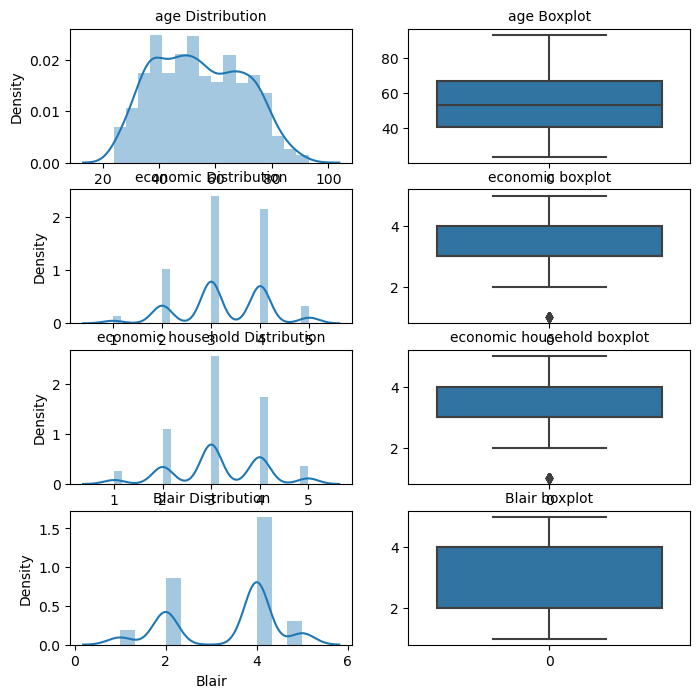

In [13]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(8,8)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)

C:\Users\dell\AppData\Local\Temp\ipykernel_4408\2851028452.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(df['Hague'] , ax=axes[0][0])
C:\Users\dell\AppData\Local\Temp\ipykernel_4408\2851028452.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a=sns.distplot(df['Europe'], ax=axes[1][0])
C:\Users\d

Text(0.5, 1.0, 'political knowledge boxplot')

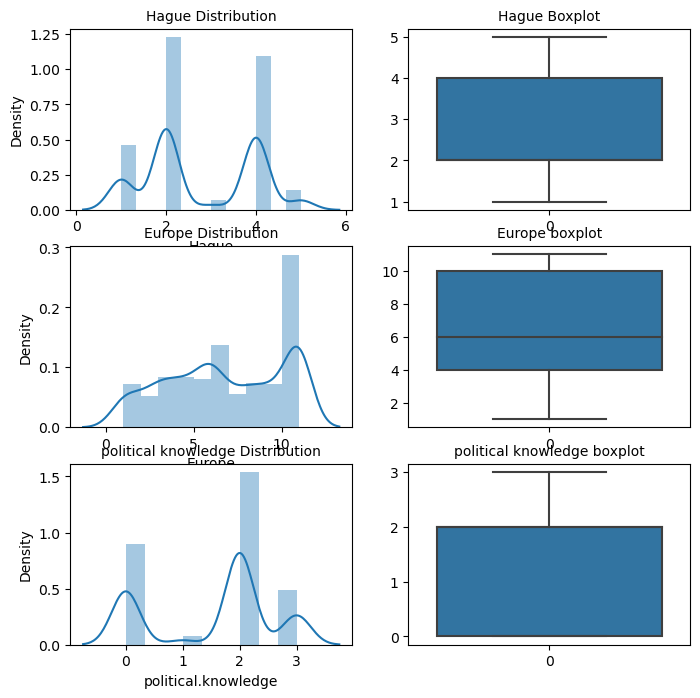

In [14]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(8,8)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)

# BIVARIENET ANALYSIS

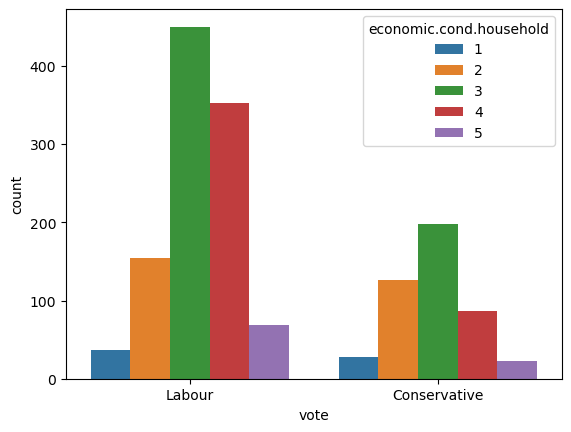

In [15]:
sns.countplot(df, x="vote", hue="economic.cond.household");



<Axes: xlabel='vote', ylabel='count'>

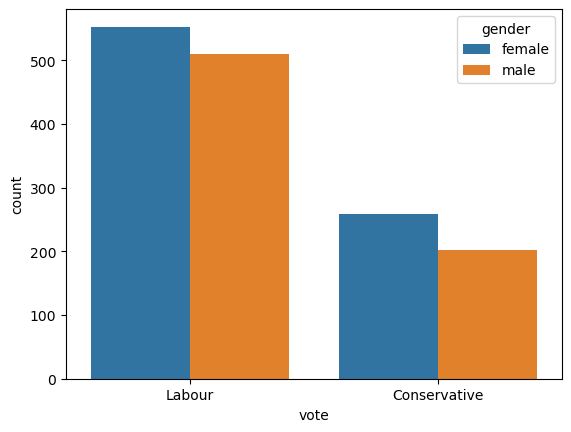

In [16]:
sns.countplot(data=df,x='vote',hue='gender')

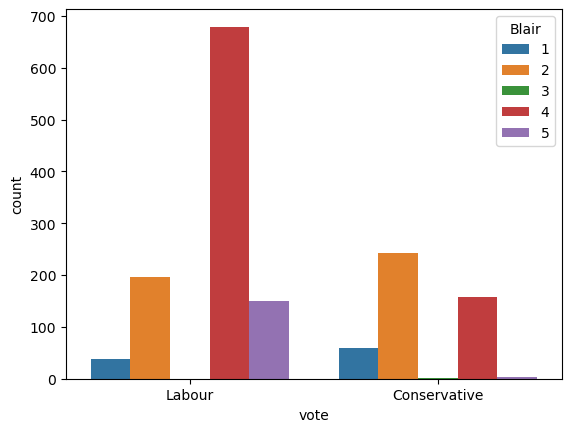

In [17]:
sns.countplot(df, x="vote", hue="Blair");

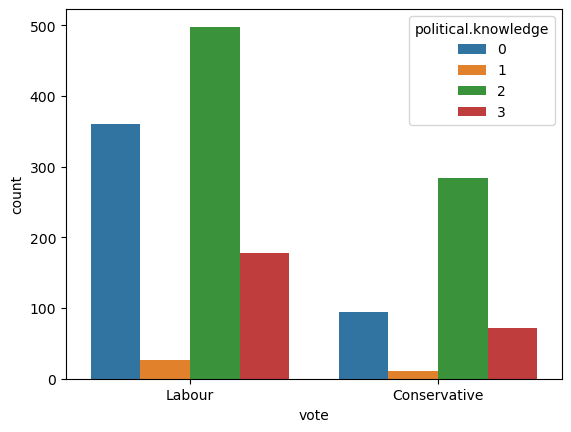

In [18]:
sns.countplot(df, x="vote", hue="political.knowledge");

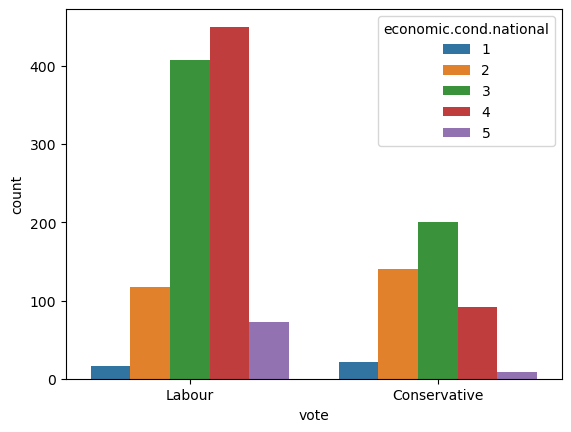

In [19]:
sns.countplot(df, x="vote", hue="economic.cond.national");

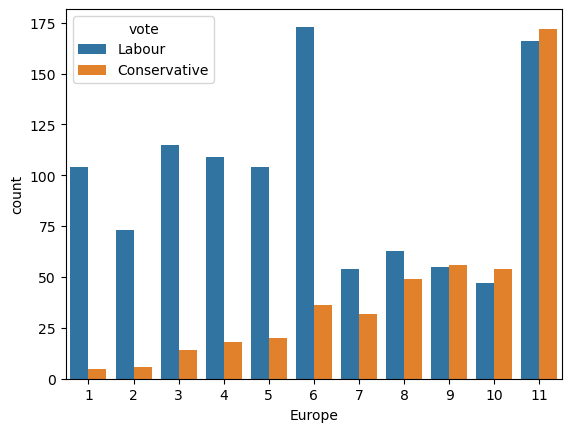

In [20]:
sns.countplot(df, x="Europe", hue="vote");

In [21]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

# MUTLIVARIENT ANALYSIS

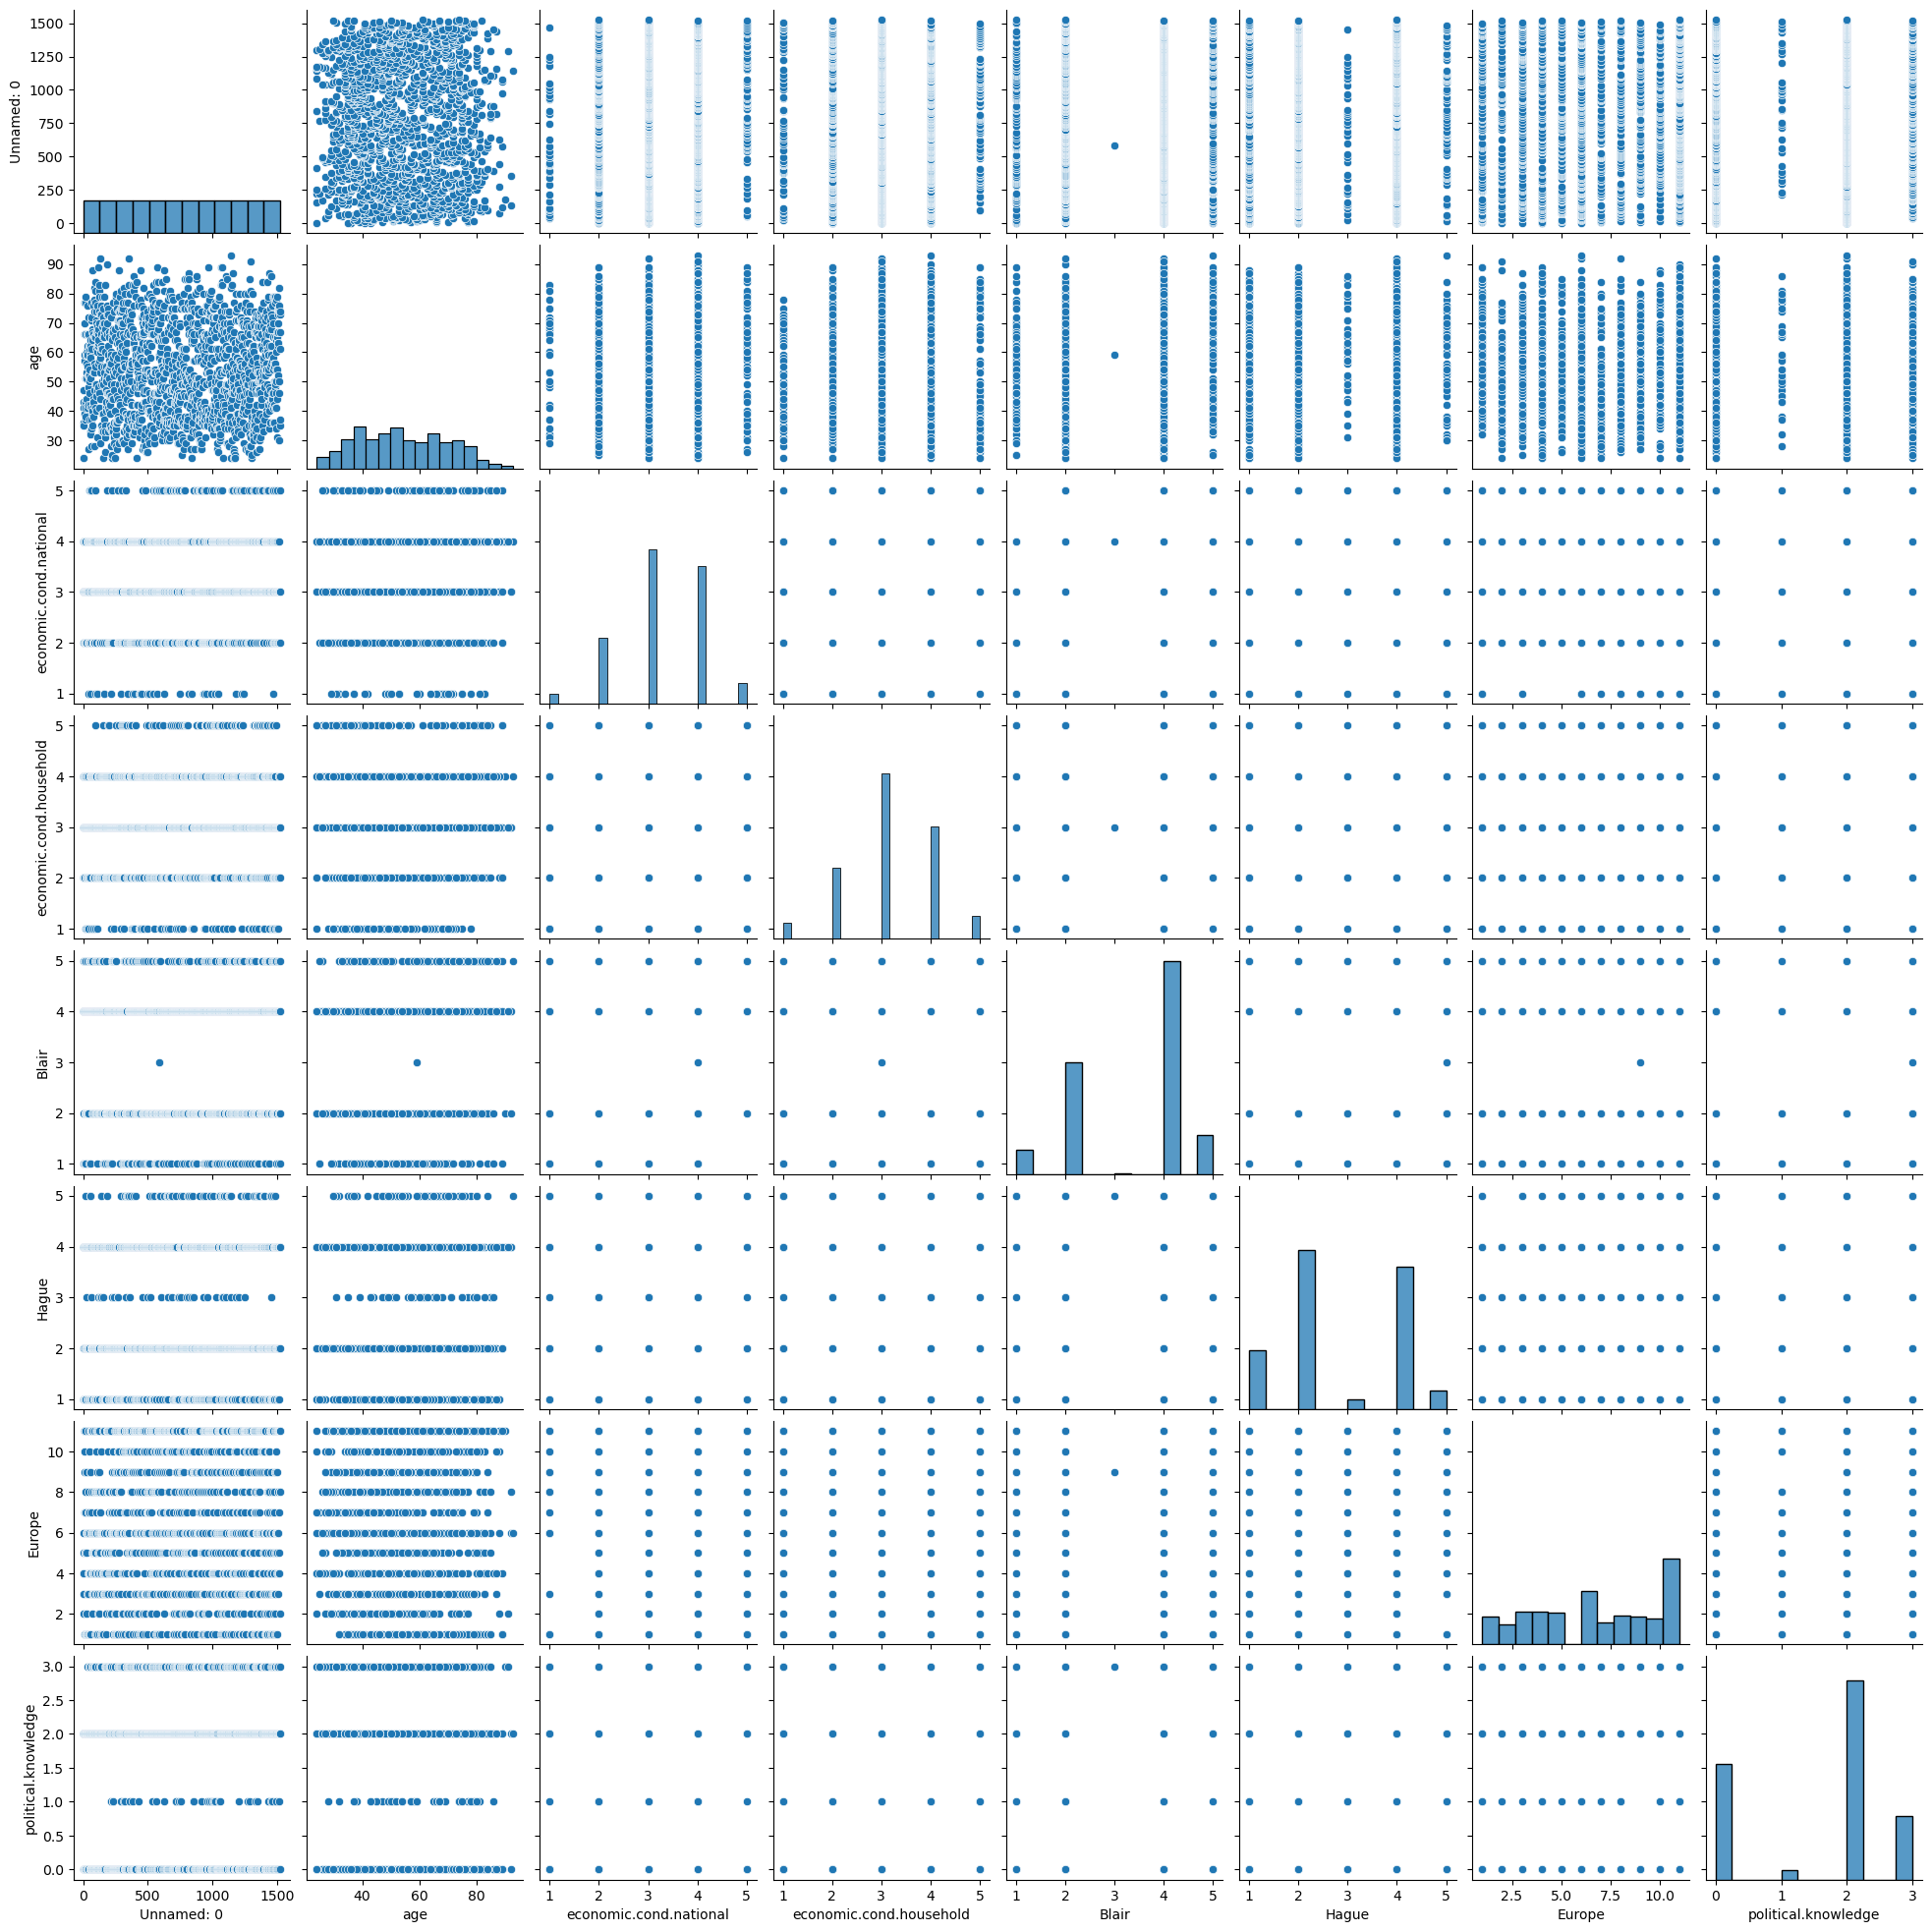

In [27]:
sns.pairplot(df)

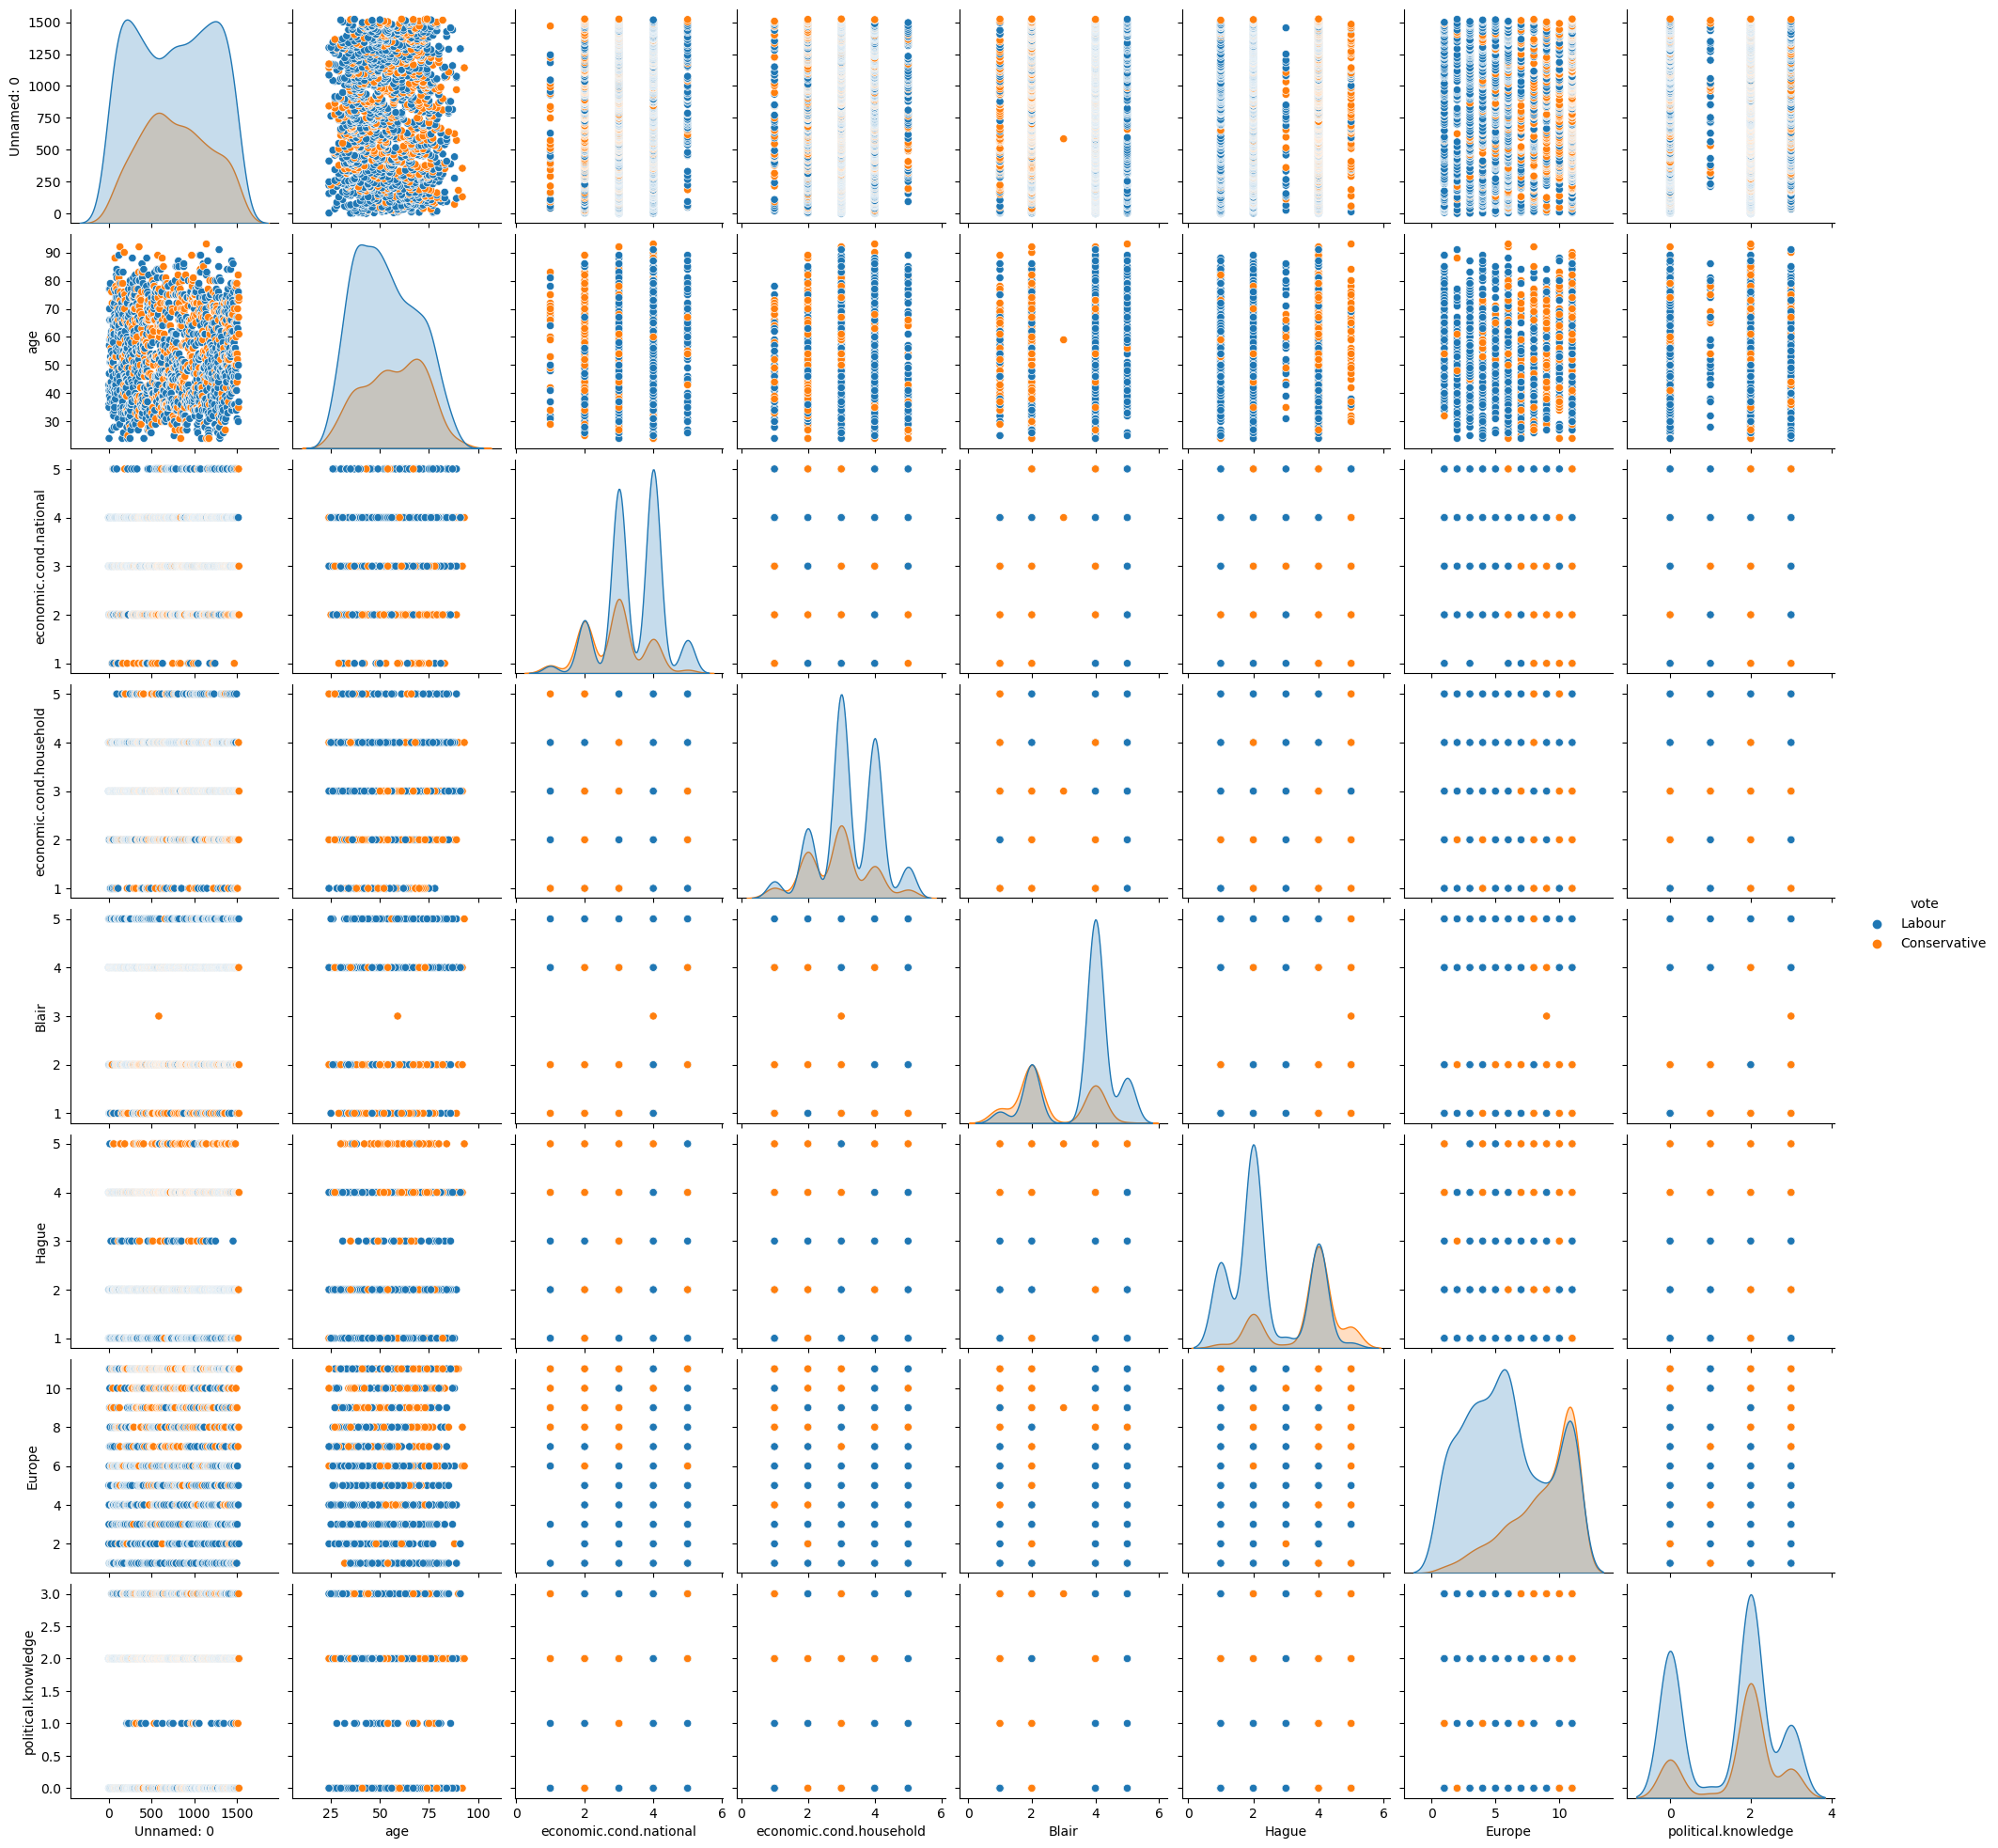

In [28]:
sns.pairplot(df, hue='vote')

C:\Users\dell\AppData\Local\Temp\ipykernel_4408\1426671555.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

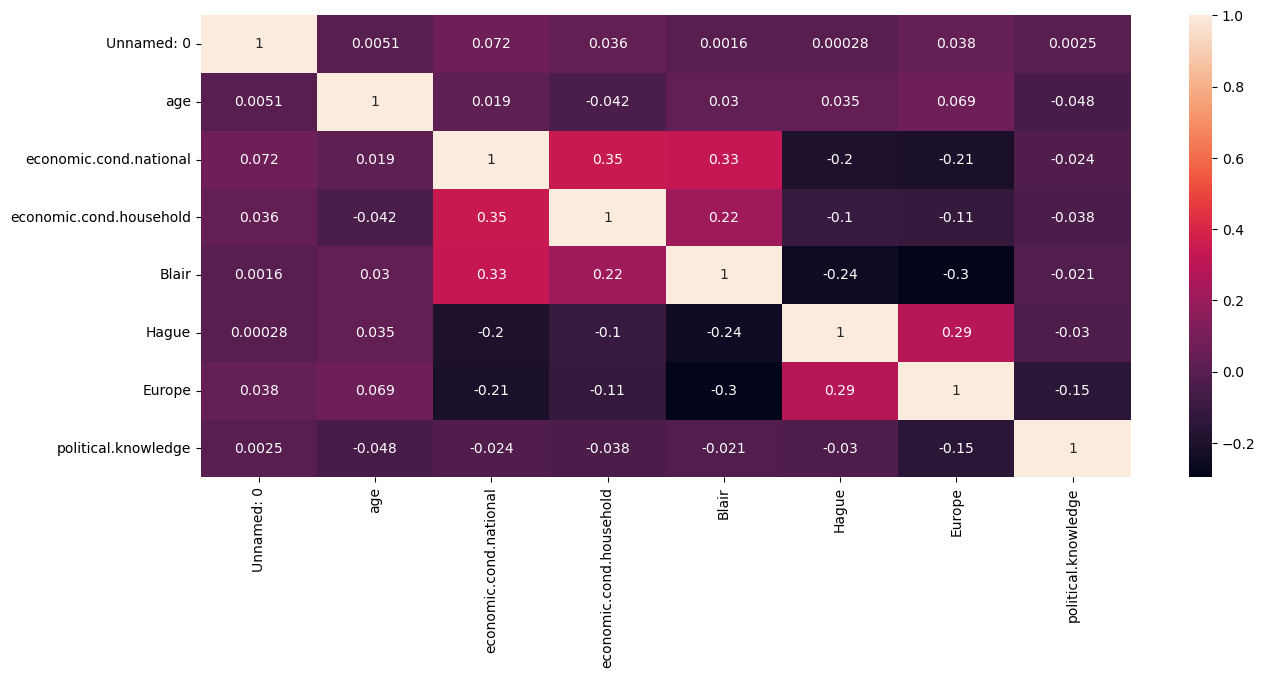

In [29]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [103]:
df.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_4408\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
Unnamed: 0,1.000000,0.005128,0.071882,0.035907,0.001602,0.000282,0.038218,0.002485
age,0.005128,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.071882,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,0.035907,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.001602,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.000282,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.038218,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,0.002485,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


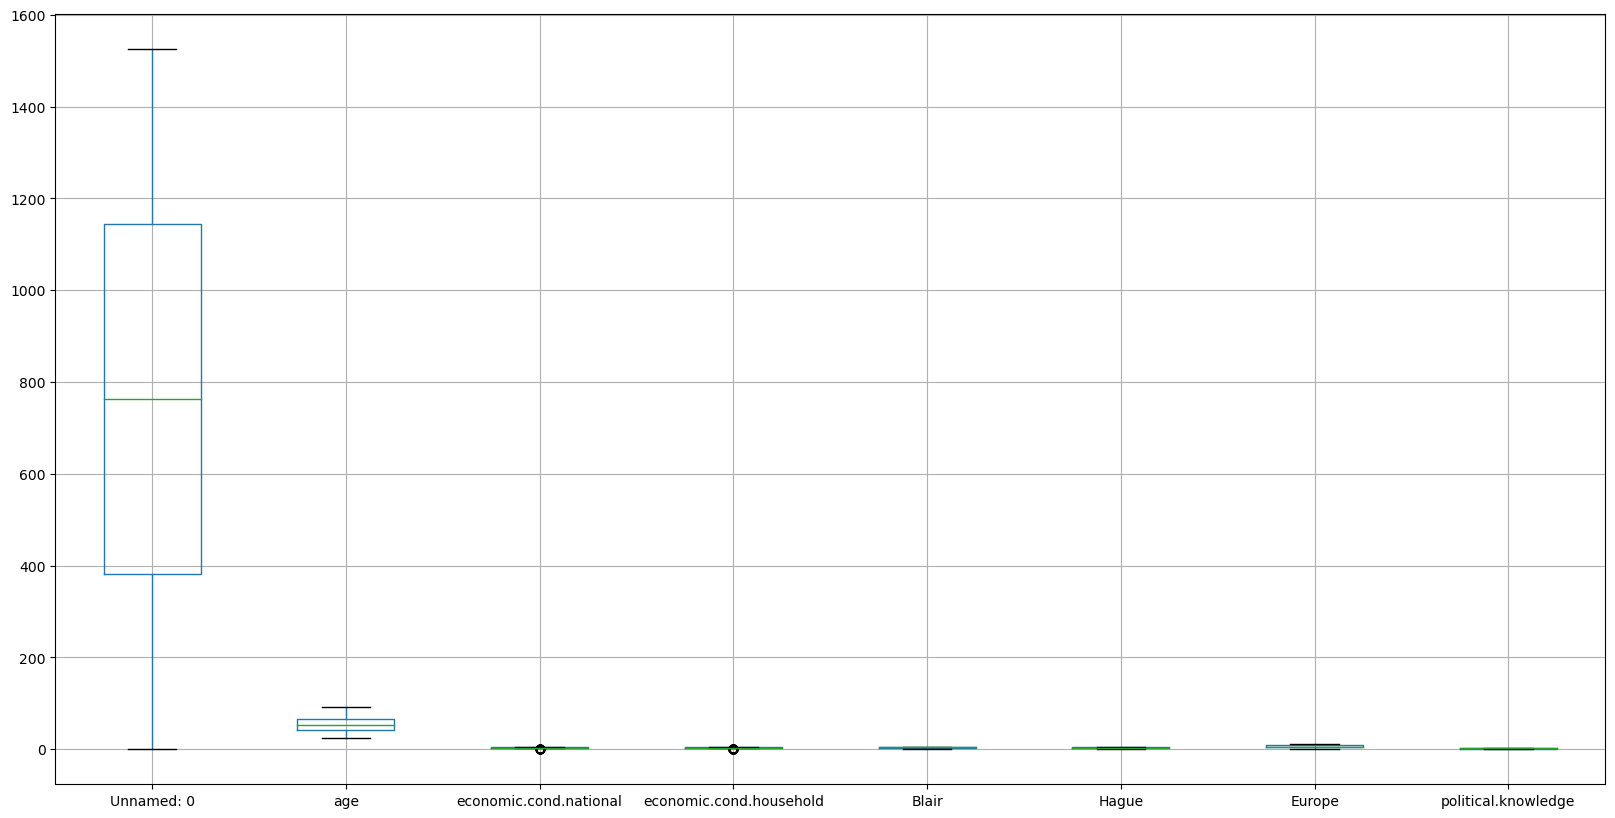

In [31]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


# ENCODING 

In [33]:
cat1 = ['vote', 'gender']
            

In [34]:
df1 =pd.get_dummies(df, columns=cat1,drop_first=True)

In [35]:
df1.head()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,1,43,3,3,4,1,2,2,1,0
1,2,36,4,4,4,4,5,2,1,1
2,3,35,4,4,5,2,3,2,1,1
3,4,24,4,2,2,1,4,0,1,0
4,5,41,2,2,1,1,6,2,1,1


In [36]:
df1= df1.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)

In [37]:
df1.sample(10)

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
154,155,70,3,4,5,2,1,2,1,0
183,184,73,3,2,4,4,3,0,1,0
1280,1281,42,3,1,4,2,4,2,1,0
1383,1384,35,5,4,2,2,4,0,1,0
1324,1325,39,4,3,4,2,8,0,1,1
1127,1128,61,3,3,4,2,6,0,1,0
1201,1202,57,4,4,4,3,11,1,1,0
629,630,81,1,3,4,2,11,1,1,0
97,98,45,3,2,2,2,10,0,1,1
75,76,53,4,4,4,2,5,3,1,1


In [38]:
X=df1.drop('IsLabour_or_not',axis=1)
Y=df1['IsLabour_or_not']

In [39]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

# GAUSSIAN NB

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [107]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8388003748828491
[[242  90]
 [ 82 653]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       332
           1       0.88      0.89      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [104]:
Y_train_prob=NB_model.predict_proba(X_train)
pd.DataFrame(Y_train_prob).head()

,0,1
0,0.674324,0.325676
1,0.256733,0.743267
2,0.112146,0.887854
3,0.168994,0.831006
4,0.026376,0.973624


the auc 0.888 


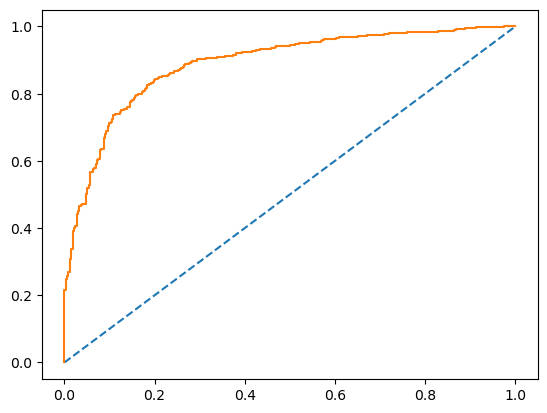

In [42]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

Axes(0.125,0.11;0.62x0.77)


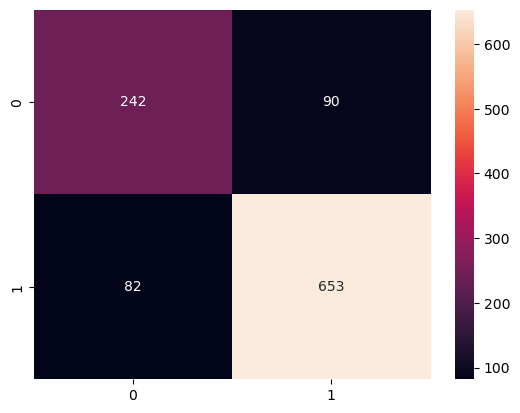

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True , fmt="2g"))

In [44]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8209606986899564
[[ 94  36]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.83      0.82      0.82       458



Axes(0.125,0.11;0.62x0.77)


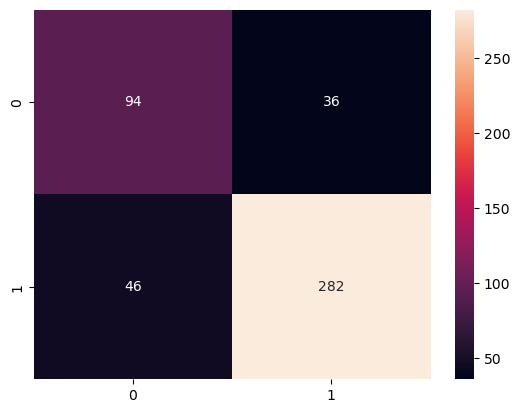

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True , fmt="2g"))

the auc curve 0.886 


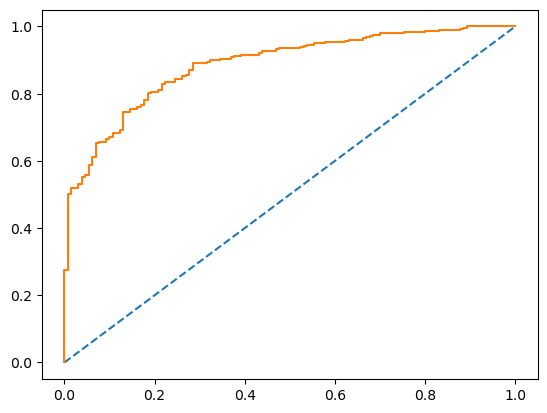

In [108]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

In [105]:
Y_test_prob=NB_model.predict_proba(X_test)
pd.DataFrame(Y_test_prob).head()

,0,1
0,0.990544,0.009456
1,0.874555,0.125445
2,0.402754,0.597246
3,0.566358,0.433642
4,0.231714,0.768286


# SCALING

In [47]:
x=df1.drop('IsLabour_or_not',axis=1)
y=df1['IsLabour_or_not']

In [48]:
x.head()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,1,43,3,3,4,1,2,2,0
1,2,36,4,4,4,4,5,2,1
2,3,35,4,4,5,2,3,2,1
3,4,24,4,2,2,1,4,0,0
4,5,41,2,2,1,1,6,2,1


In [49]:
from scipy.stats import zscore

In [50]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)

In [51]:
x.head(5)

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,1,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,2,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,3,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,4,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,5,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


# KNN NEIGHBOR CLASSIFIER

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)


In [53]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [55]:
print(KNN_model_score)

0.799650043744532


In [56]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[187 164]
 [ 65 727]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       351
           1       0.82      0.92      0.86       792

    accuracy                           0.80      1143
   macro avg       0.78      0.73      0.74      1143
weighted avg       0.79      0.80      0.79      1143



the auc 0.850 


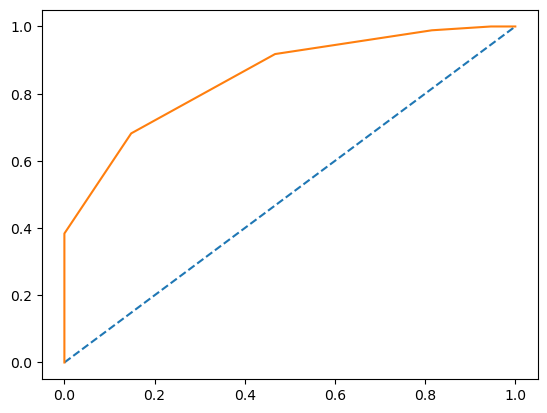

In [57]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [58]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)

0.6780104712041884


In [59]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))


[[ 34  77]
 [ 46 225]]
              precision    recall  f1-score   support

           0       0.42      0.31      0.36       111
           1       0.75      0.83      0.79       271

    accuracy                           0.68       382
   macro avg       0.59      0.57      0.57       382
weighted avg       0.65      0.68      0.66       382



the auc curve 0.641 


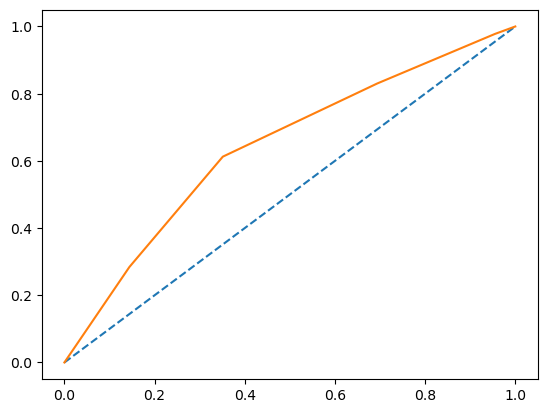

In [60]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


In [111]:
KNN_Model=KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [112]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.799650043744532
[[187 164]
 [ 65 727]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       351
           1       0.82      0.92      0.86       792

    accuracy                           0.80      1143
   macro avg       0.78      0.73      0.74      1143
weighted avg       0.79      0.80      0.79      1143



In [63]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.6492146596858639
[[ 31  80]
 [ 54 217]]
              precision    recall  f1-score   support

           0       0.36      0.28      0.32       111
           1       0.73      0.80      0.76       271

    accuracy                           0.65       382
   macro avg       0.55      0.54      0.54       382
weighted avg       0.62      0.65      0.63       382



In [64]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)


KNeighborsClassifier()

In [65]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.799650043744532
[[187 164]
 [ 65 727]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       351
           1       0.82      0.92      0.86       792

    accuracy                           0.80      1143
   macro avg       0.78      0.73      0.74      1143
weighted avg       0.79      0.80      0.79      1143



In [66]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.6780104712041884
[[ 34  77]
 [ 46 225]]
              precision    recall  f1-score   support

           0       0.42      0.31      0.36       111
           1       0.75      0.83      0.79       271

    accuracy                           0.68       382
   macro avg       0.59      0.57      0.57       382
weighted avg       0.65      0.68      0.66       382



In [67]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.31413612565445026,
 0.31151832460732987,
 0.32198952879581155,
 0.32984293193717273,
 0.32460732984293195,
 0.31937172774869105,
 0.31413612565445026,
 0.31413612565445026,
 0.32198952879581155,
 0.32198952879581155]

the auc curve 0.720 


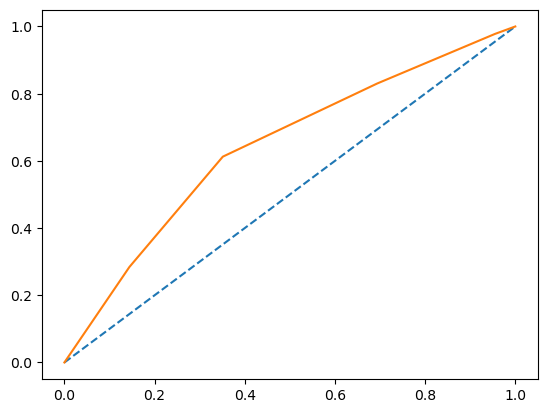

In [68]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

the auc curve 0.609 


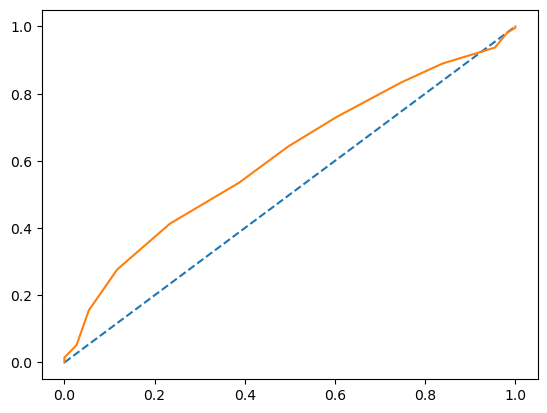

In [69]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


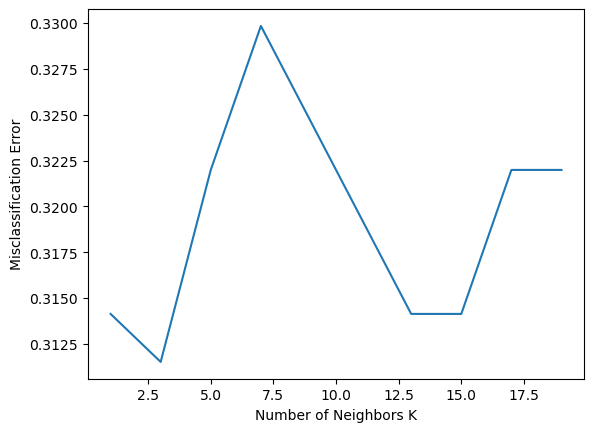

In [70]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# LINEAR DISCRIMINATE ANALYSIS (LDA)

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [72]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [73]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8388003748828491
[[235  97]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



the auc 0.889 


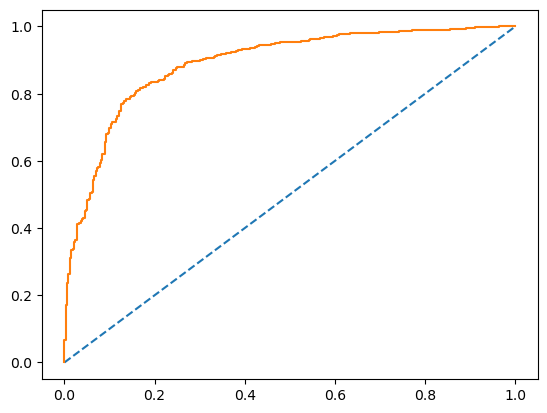

In [74]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);


In [113]:
y_train_prob=LDA_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.655725,0.344275
1,0.156789,0.843211
2,0.186375,0.813625
3,0.136064,0.863936
4,0.040668,0.959332


In [75]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [114]:
y_test_prob=LDA_model.predict_proba(X_train)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.655725,0.344275
1,0.156789,0.843211
2,0.186375,0.813625
3,0.136064,0.863936
4,0.040668,0.959332


the auc curve 0.884 


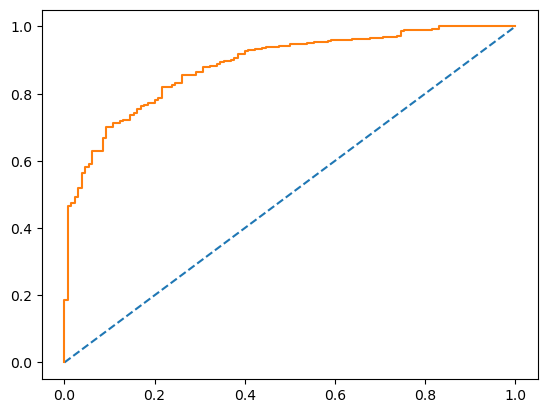

In [76]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

# LOGISTIC REGRESSION

In [77]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

D:\py\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [78]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.837863167760075
[[229 103]
 [ 70 665]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [79]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.629796,0.370204
1,0.180228,0.819772
2,0.191912,0.808088
3,0.169680,0.830320
4,0.054035,0.945965


In [80]:
Logistic_model.score(X_train,Y_train)


0.837863167760075

AUC: 0.889


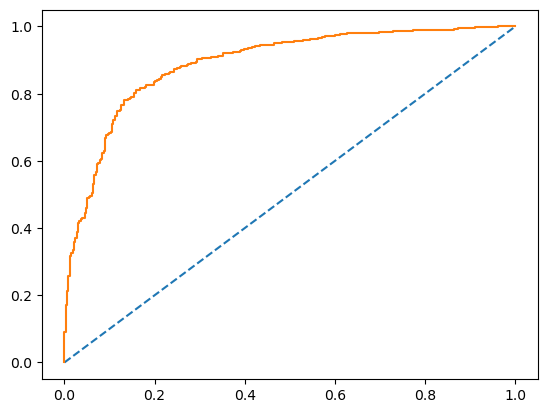

In [81]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [82]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [83]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.930667,0.069333
1,0.696081,0.303919
2,0.323824,0.676176
3,0.475360,0.524640
4,0.150966,0.849034


AUC: 0.883


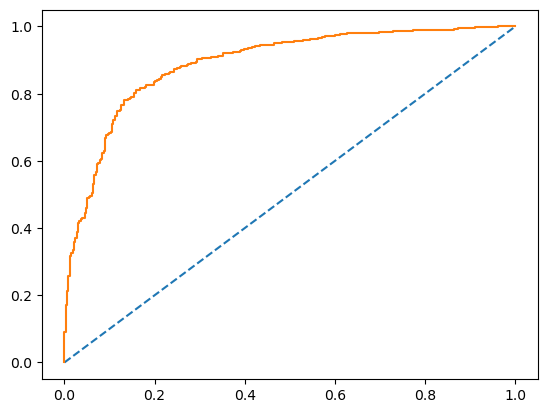

In [84]:

probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);


# BAGGING CLASSFIER

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)


In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)


D:\py\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [88]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

1.0
[[332   0]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



AUC: 1.000


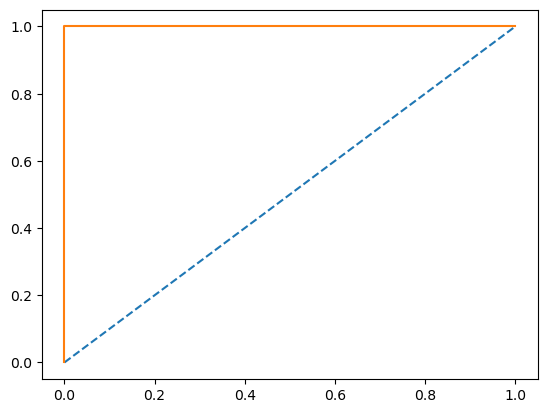

In [89]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [90]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))


0.8122270742358079
[[ 93  37]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       130
           1       0.88      0.85      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.81      0.81       458



AUC: 0.882


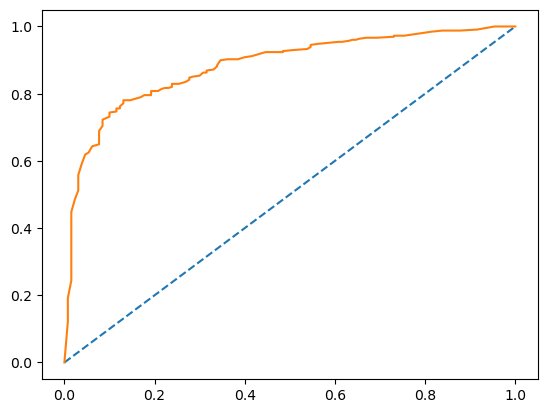

In [91]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

# ADA BOOST CLASSIFIER

In [92]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [93]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))


0.865979381443299
[[249  83]
 [ 60 675]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       332
           1       0.89      0.92      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.86      1067



AUC: 0.934


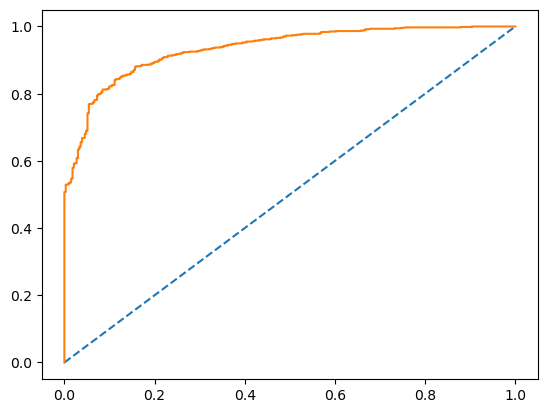

In [94]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

# GRADIENT BOOSTING CLASSFIER

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [96]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))


0.9109653233364574
[[242  90]
 [ 82 653]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       332
           1       0.93      0.95      0.94       735

    accuracy                           0.91      1067
   macro avg       0.90      0.89      0.89      1067
weighted avg       0.91      0.91      0.91      1067



AUC: 0.968


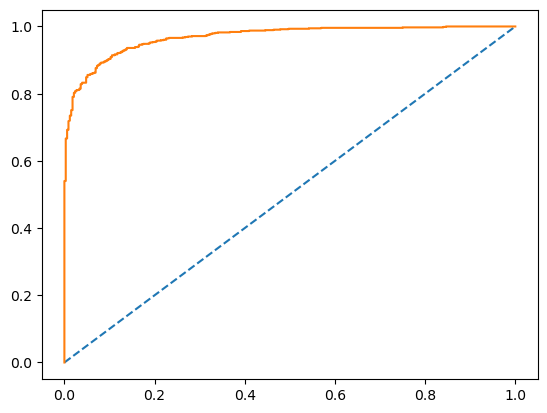

In [97]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)


In [98]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8100436681222707
[[ 94  36]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.83      0.82      0.82       458



AUC: 0.876


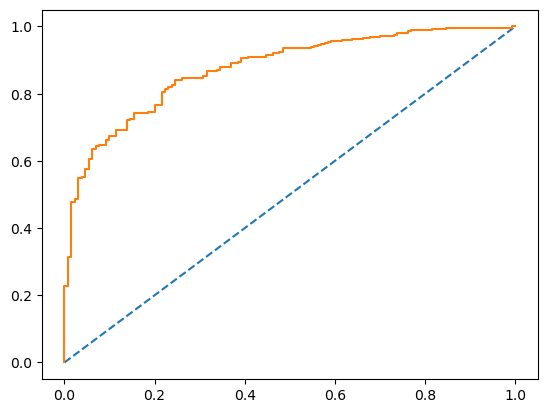

In [99]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);


In [100]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8362445414847162
[[ 94  36]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.83      0.82      0.82       458



AUC: 0.900


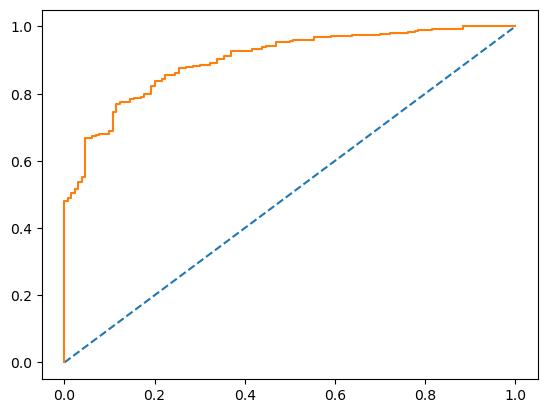

In [101]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

# Q8) Based on these predictions, what are the insights
 1)Comparing all the performance measure, Naïve Bayes model from second iteration is performing best. Although there are some other models such as SVM and Extreme Boosting which is performing almost same as that of Naïve Bayes. But Naïve Bayes model is very consistent when train and test results are compared with each other. Along with other parameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results were pretty good is this model.

2)Labour party is performing better than Conservative from huge margin.

3)Female voters turn out is greater than the male voters.

4)Those who have better national economic conditions are preferring to vote for Labour party.

5)Persons having higher Eurosceptic sentiments conservative party are preferring to vote for Conservative party.

6)Those who have higher political knowledge have voted for Conservative party

7)Looking at the assessment for both the leaders, Labour Leader is performing well as he has got better ratings in assessment.